In [1]:
%pip install chromospyce -q
%pip install pyBigWig -q
import pyBigWig
import chromospyce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


249250621


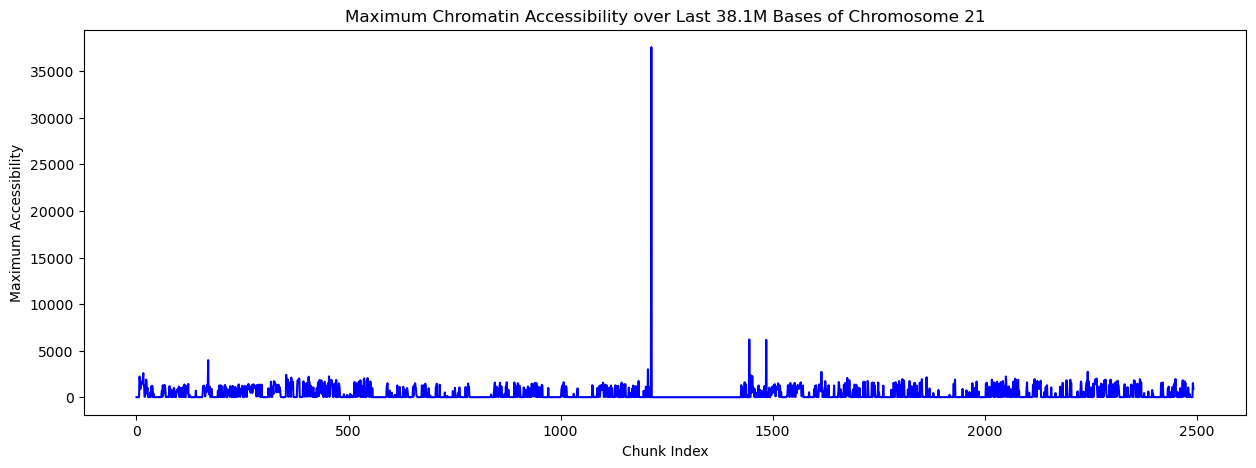

248300000
2484
37580.0
0.0


Widget(structure=b'\xff\xff\xff\xffx\x03\x00\x00\x10\x00\x00\x00\x00\x00\n\x00\x0e\x00\x06\x00\x05\x00\x08\x00…

In [2]:
#mnase-seq
bw_mnase = pyBigWig.open("mnase-seq/mnase.bw")


chrom = "chr1"
start = 0
end = bw_mnase.chroms(chrom)

values_mnase = bw_mnase.values(chrom, start, end, numpy=True)

bw_mnase.close()

print(end)

chunk_size = 100000
max_mnase = []
for i in range(0, len(values_mnase), chunk_size):
    chunk = values_mnase[i:i + chunk_size]
    max = np.nanmax(chunk)
    max_mnase.append(max)


max_mnase_array = np.array(max_mnase)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_mnase_array)), max_mnase_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Last 38.1M Bases of Chromosome 21')
plt.show()

data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom21_mat = data[(data['chr']== '1(pat)')]
chrom21_mat_coords1 = chrom21_mat[["x", "y", "z"]].to_numpy()
chrom21_mat_coords = chrom21_mat[["coord"]].to_numpy()

print(np.max(chrom21_mat_coords) - np.min(chrom21_mat_coords))
print(len(chrom21_mat_coords))

chrom21_mat.reset_index(drop=True, inplace=True)
print(np.max(max_mnase_array))
print(np.min(max_mnase_array))


color_values = max_mnase_array.tolist()

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_mnase_array),
        "max": 8000,
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

chromospyce.Widget(chrom21_mat_coords1, vc)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to parse WIG file
def parse_wig(wig_file, chrom):
    values = []
    with open(wig_file, 'r') as file:
        for line in file:
            if line.startswith("track") or line.startswith("fixedStep") or line.startswith("variableStep"):
                continue
            values.append(float(line.strip()))
    return np.array(values)

# File path and chromosome selection
wig_file_path = "mnase-seq/mnaseLymph.wig"
chrom = "chr12"

# Parse the WIG file for the specified chromosome
values_mnase = parse_wig(wig_file_path, chrom)
print(values_mnase)

# Calculate maximum accessibility in chunks
chunk_size = 100000
max_mnase = []
for i in range(0, len(values_mnase), chunk_size):
    chunk = values_mnase[i:i + chunk_size]
    max_val = np.nanmax(chunk)
    max_mnase.append(max_val)

max_mnase_array = np.array(max_mnase)

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(np.arange(len(max_mnase_array)), max_mnase_array, color='blue')
ax.set_xlabel('Chunk Index')
ax.set_ylabel('Maximum Accessibility')
ax.set_title('Maximum Chromatin Accessibility over Last 38.1M Bases of Chromosome 21')
plt.show()

# Reading 3D spatial data
data = pd.read_parquet('Tan3D.parquet', engine='pyarrow')

chrom21_mat = data[(data['chr'] == '12(pat)')]
chrom21_mat_coords1 = chrom21_mat[["x", "y", "z"]].to_numpy()
chrom21_mat_coords = chrom21_mat[["coord"]].to_numpy()

print(np.max(chrom21_mat_coords) - np.min(chrom21_mat_coords))
print(len(chrom21_mat_coords))

chrom21_mat.reset_index(drop=True, inplace=True)
print(np.max(max_mnase_array))
print(np.min(max_mnase_array))

# Visualize 3D structure with chromatin accessibility data
color_values = max_mnase_array.tolist()

vc = {
    "color": {
        "values": color_values,
        "min": np.min(max_mnase_array),
        "max": 8000,
        "colorScale": "YlOrRd"  # Red to yellow to purple (so red and purple are the extreme values)
    },
    "scale": 0.01,
    "links": True,
    "mark": "sphere"
}

chromospyce.Widget(chrom21_mat_coords1, vc)
